In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING 

In [2]:
df = pd.read_csv("weekly_media_sample.csv")

In [3]:
df

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00
...,...,...,...,...,...,...,...,...
203,204,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00


In [4]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(8, 'revenue').index
columns

Index(['revenue', 'competitor_sales', 'media1_S', 'newsletter', 'media3_S',
       'media2_S', 'X'],
      dtype='object')

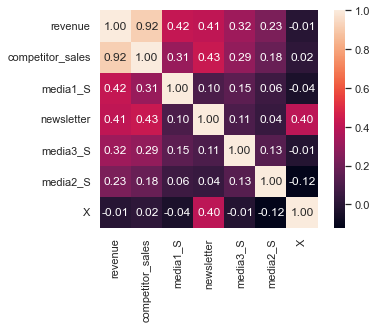

In [5]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [6]:
print(df['revenue'].min())
print(df['revenue'].max())

672250.0
3827520.0


In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])
start_date = pd.to_datetime("2012-08-06")
end_date = pd.to_datetime("2016-05-30")
filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
filtered_df = filtered_df[['revenue', 'media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]

# Step 2: Model Building
X = filtered_df[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]
Y = filtered_df['revenue']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Step 3: Fit the Multiple Linear Regression Model
model = sm.OLS(Y, X)
results = model.fit()

# Step 4: Results Interpretation
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 08 May 2023   Prob (F-statistic):           9.58e-82
Time:                        21:31:02   Log-Likelihood:                -2781.0
No. Observations:                 200   AIC:                             5574.
Df Residuals:                     194   BIC:                             5594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.959e+04   5.43e+04  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [8]:
test_start_date = pd.to_datetime("2016-06-06")
test_end_date = pd.to_datetime("2016-07-25")
test_df = df[(df['DATE'] >= test_start_date) & (df['DATE'] <= test_end_date)]
# test_df = test_df[['revenue', 'media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]

In [9]:
test_df

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
200,201,2016-06-06,2.510952e+06,208627.1,0.000000,0.000000,7702931,50905.00
201,202,2016-06-13,2.275620e+06,0.0,147067.000000,0.000000,7060116,79428.00
202,203,2016-06-20,2.505162e+06,144479.6,0.000000,415793.810329,7603752,58284.00
203,204,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00
207,208,2016-07-25,2.767788e+06,0.0,0.000000,366190.759370,9067759,19401.65


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


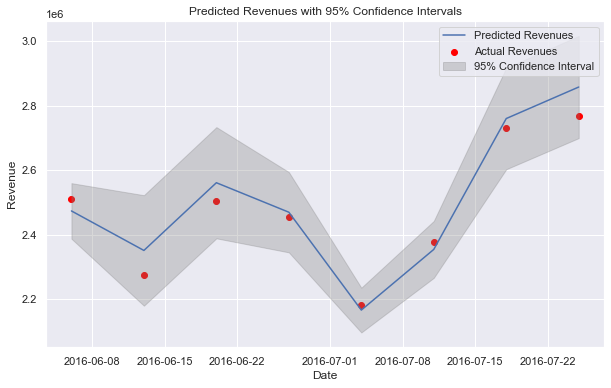

In [10]:
X_test = test_df[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']]
X_test = sm.add_constant(X_test)

predicted_revenues = results.predict(X_test)

# Plot Predicted Revenues with Confidence Intervals
plt.figure(figsize=(10, 6))
plt.plot(test_df['DATE'], predicted_revenues, label='Predicted Revenues')
plt.scatter(test_df['DATE'], test_df['revenue'], color='red', label='Actual Revenues')

# Calculate upper and lower confidence intervals
predictions_summary = results.get_prediction(X_test)
predicted_mean = predictions_summary.predicted_mean
ci = predictions_summary.conf_int(alpha=0.05)

# Plot the confidence intervals
plt.fill_between(test_df['DATE'], ci[:, 0], ci[:, 1], color='gray', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Predicted Revenues with 95% Confidence Intervals')
plt.legend()

plt.show()


In [11]:
from sklearn.metrics import mean_squared_error

actual_revenues = test_df['revenue']
rmse = np.sqrt(mean_squared_error(actual_revenues, predicted_revenues))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 50361.289034879555


### Applying ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


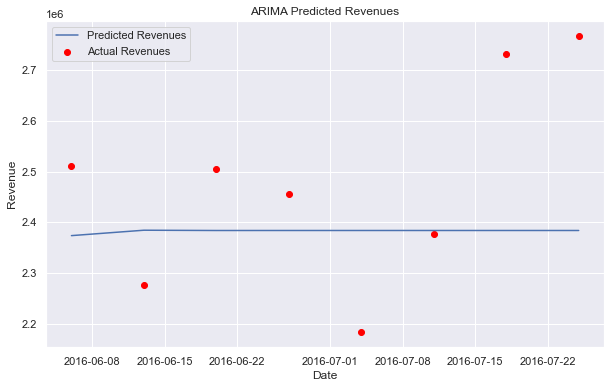

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Data Preparation (assuming 'df' and 'filtered_df' are already defined)

# Filter the data for the training period
train_start_date = pd.to_datetime("2012-08-06")
train_end_date = pd.to_datetime("2016-05-30")
train_df = df[(df['DATE'] >= train_start_date) & (df['DATE'] <= train_end_date)]
train_df = train_df[['DATE', 'revenue']]

# Step 2: Fit ARIMA Model

# Convert the 'DATE' column to a datetime index
train_df.set_index('DATE', inplace=True)

# Fit ARIMA model with appropriate order (p, d, q)
model = ARIMA(train_df, order=(1, 1, 1))
results = model.fit()

# Step 3: Predict Revenues for the Test Period

# Filter the data for the test period
test_df = df[(df['DATE'] >= test_start_date) & (df['DATE'] <= test_end_date)]
test_dates = test_df['DATE']

# Predict revenues using the fitted ARIMA model
predicted_revenues_ARIMA = results.forecast(len(test_dates))

# Step 4: Plot Predicted Revenues with Confidence Intervals
plt.figure(figsize=(10, 6))
plt.plot(test_dates, predicted_revenues_ARIMA, label='Predicted Revenues')
plt.scatter(test_dates, test_df['revenue'], color='red', label='Actual Revenues')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('ARIMA Predicted Revenues')
plt.legend()

# Show the plot
plt.show()


In [13]:
actual_revenues_ARIMA = test_df['revenue']
rmse = np.sqrt(mean_squared_error(actual_revenues_ARIMA, predicted_revenues_ARIMA))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 212131.66091287995


### 2a: Bayesian model estimation

C:\ProgramData\Anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta5]
>Metropolis: [beta4]
>Metropolis: [beta3]
>Metropolis: [beta2]
>Metropolis: [beta1]
>Metropolis: [beta0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 663 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_8228/3547853934.py:34: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


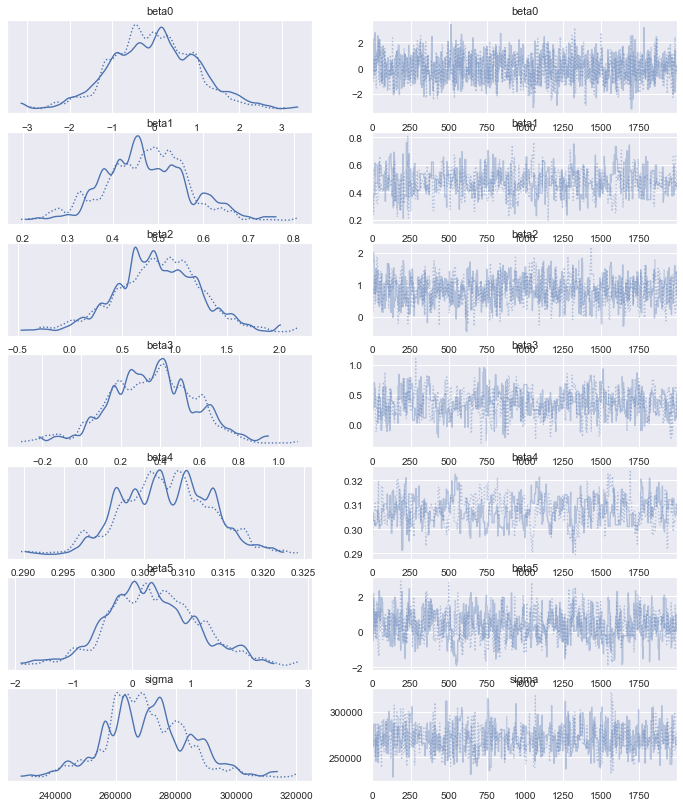

Got error No model on context stack. trying to find log_likelihood in translation.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


             mean         sd    hdi_2.5%   hdi_97.5%  mcse_mean  mcse_sd  \
beta0      -0.006      0.974      -1.877       1.972      0.035    0.028   
beta1       0.474      0.090       0.317       0.669      0.005    0.003   
beta2       0.844      0.392       0.055       1.591      0.017    0.013   
beta3       0.360      0.210      -0.009       0.799      0.011    0.008   
beta4       0.308      0.005       0.297       0.318      0.000    0.000   
beta5       0.362      0.770      -1.052       1.954      0.044    0.031   
sigma  270117.094  13577.611  241811.916  295942.917    543.233  385.051   

       ess_bulk  ess_tail  r_hat  
beta0     803.0     933.0   1.00  
beta1     381.0     413.0   1.01  
beta2     526.0     702.0   1.00  
beta3     390.0     512.0   1.00  
beta4     157.0     263.0   1.01  
beta5     304.0     484.0   1.01  
sigma     622.0     557.0   1.01  


In [14]:
# Load the data
data = pd.read_csv("weekly_media_sample.csv")

# Filter the data for the training period
train_start_date = "2012-08-06"
train_end_date = "2016-05-30"
train_data = data[(data["DATE"] >= train_start_date) & (data["DATE"] <= train_end_date)]

# Define the model
with pm.Model() as linear_model:
    # Priors
    beta0 = pm.Normal("beta0", mu=0, sd=1)
    beta1 = pm.Normal("beta1", mu=0, sd=1)
    beta2 = pm.Normal("beta2", mu=0, sd=1)
    beta3 = pm.Normal("beta3", mu=0, sd=1) 
    beta4 = pm.Normal("beta4", mu=0, sd=1)
    beta5 = pm.Normal("beta5", mu=0, sd=1)

    
    # Model equation
    revenue_est = beta0 + beta1 * train_data["media1_S"] + beta2 * train_data["media2_S"] + \
                  beta3 * train_data["media3_S"] + beta4 * train_data["competitor_sales"] + \
                  beta5 * train_data["newsletter"]
    
    # Likelihood
    sigma = pm.HalfCauchy("sigma", beta=10)
    likelihood = pm.Normal("likelihood", mu=revenue_est, sd=sigma, observed=train_data["revenue"])
    
    # Inference
    trace = pm.sample(draws=2000, tune=2000, step=pm.Metropolis())
# Adjust the number of samples and tuning steps as needed

# Check convergence
pm.traceplot(trace)
plt.show()

# Summarize the posterior
summary = pm.summary(trace, hdi_prob=0.95)
print(summary)


### 2b: Prior Choice

#### Bayesian estimation based on expert claims

C:\ProgramData\Anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta5]
>Metropolis: [beta4]
>Metropolis: [beta3]
>Metropolis: [beta2]
>Metropolis: [beta1]
>Metropolis: [beta0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 658 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_8228/319826257.py:23: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


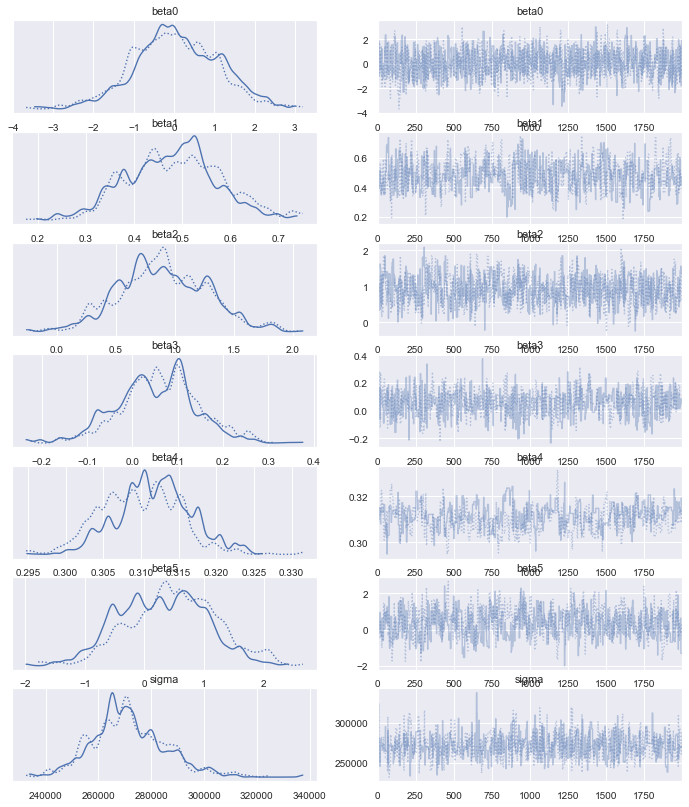

Got error No model on context stack. trying to find log_likelihood in translation.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


             mean         sd    hdi_2.5%   hdi_97.5%  mcse_mean  mcse_sd  \
beta0       0.055      1.045      -1.776       2.322      0.039    0.028   
beta1       0.482      0.096       0.296       0.662      0.005    0.003   
beta2       0.905      0.371       0.191       1.582      0.016    0.011   
beta3       0.056      0.086      -0.120       0.220      0.004    0.003   
beta4       0.311      0.005       0.301       0.321      0.000    0.000   
beta5       0.391      0.735      -1.050       1.777      0.042    0.029   
sigma  271585.206  13937.940  246861.513  302013.752    567.197  401.263   

       ess_bulk  ess_tail  r_hat  
beta0     713.0     800.0   1.00  
beta1     431.0     531.0   1.00  
beta2     559.0     703.0   1.01  
beta3     575.0     542.0   1.01  
beta4     152.0     265.0   1.03  
beta5     312.0     538.0   1.02  
sigma     601.0     664.0   1.00  


In [15]:
with pm.Model() as modified_model:

    beta0 = pm.Normal("beta0", mu=0, sd=1)
    beta1 = pm.Normal("beta1", mu=0, sd=1)
    beta2 = pm.Normal("beta2", mu=0, sd=1)
    beta3 = pm.Normal("beta3", mu=0, sd=0.1)  # Adjusted prior for Media 3
    beta4 = pm.Normal("beta4", mu=0, sd=1)
    beta5 = pm.Normal("beta5", mu=0, sd=1)

    
    # Model equation
    revenue_est = beta0 + beta1 * train_data["media1_S"] + beta2 * train_data["media2_S"] + \
                  beta3 * train_data["media3_S"] + beta4 * train_data["competitor_sales"] + \
                  beta5 * train_data["newsletter"]
    
    # Likelihood
    sigma = pm.HalfCauchy("sigma", beta=10)
    likelihood = pm.Normal("likelihood", mu=revenue_est, sd=sigma, observed=train_data["revenue"])
    
    # Inference
    trace = pm.sample(draws=2000, tune=2000, step=pm.Metropolis()) # Adjust the number of samples and tuning steps as needed

pm.traceplot(trace)
plt.show()

summary_modified = pm.summary(trace, hdi_prob=0.95)
print(summary_modified)


#### Adding another experts claims

C:\ProgramData\Anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta5]
>Metropolis: [beta4]
>Metropolis: [beta3]
>Metropolis: [beta2]
>Metropolis: [beta1]
>Metropolis: [beta0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 657 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_8228/3235417885.py:22: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_modified)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


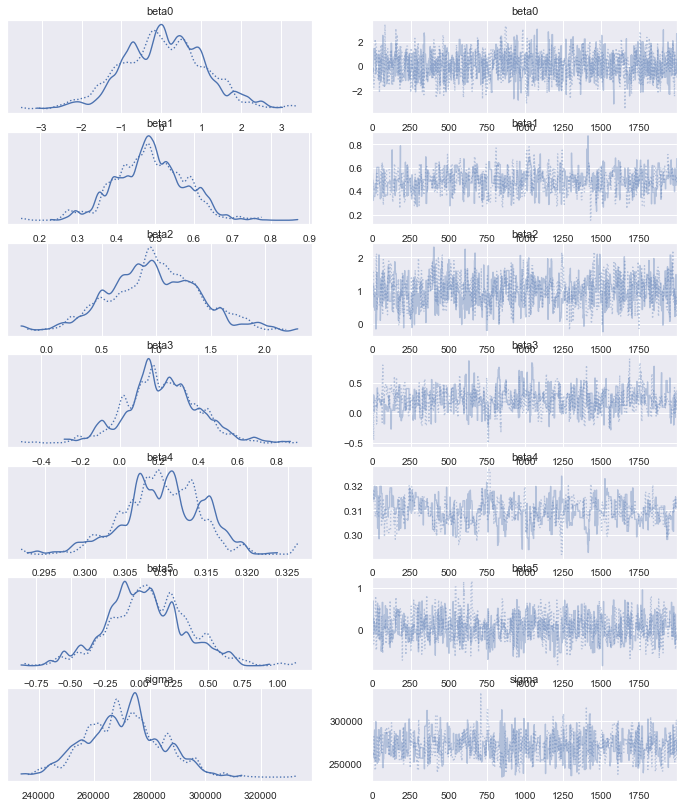

Got error No model on context stack. trying to find log_likelihood in translation.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


             mean         sd    hdi_2.5%   hdi_97.5%  mcse_mean  mcse_sd  \
beta0       0.064      1.014      -1.738       2.223      0.034    0.026   
beta1       0.487      0.089       0.302       0.646      0.004    0.003   
beta2       0.991      0.415       0.203       1.848      0.018    0.013   
beta3       0.218      0.182      -0.125       0.585      0.008    0.006   
beta4       0.309      0.005       0.299       0.318      0.000    0.000   
beta5       0.060      0.286      -0.464       0.662      0.012    0.009   
sigma  270784.018  13833.256  244203.652  297015.216    562.140  397.685   

       ess_bulk  ess_tail  r_hat  
beta0     907.0     812.0   1.00  
beta1     439.0     608.0   1.00  
beta2     533.0     766.0   1.00  
beta3     467.0     470.0   1.00  
beta4     142.0     366.0   1.01  
beta5     610.0     762.0   1.01  
sigma     609.0     546.0   1.00  


In [16]:
with pm.Model() as modified_model:
# Priors
    beta0 = pm.Normal("beta0", mu=0, sd=1)
    beta1 = pm.Normal("beta1", mu=0, sd=2)
    beta2 = pm.Normal("beta2", mu=0, sd=8)
    beta3 = pm.Normal("beta3", mu=0, sd=0.3)
    beta4 = pm.Normal("beta4", mu=0, sd=1)
    beta5 = pm.Normal("beta5", mu=0, sd=0.3)

# Model equation
    revenue_est = beta0 + beta1 * train_data['media1_S'] + beta2 * train_data['media2_S'] + \
              beta3 * train_data['media3_S'] + beta4 * train_data['competitor_sales'] + \
              beta5 * np.abs(train_data['newsletter'])

# Likelihood
    sigma = pm.HalfCauchy("sigma", beta=10)
    likelihood = pm.Normal("likelihood", mu=revenue_est, sd=sigma,  observed=train_data["revenue"])

# Inference
    trace_modified = pm.sample(draws=2000, tune=2000, step=pm.Metropolis())  # Adjust the number of samples and tuning steps as needed

pm.traceplot(trace_modified)
plt.show()

summary_modified = pm.summary(trace_modified, hdi_prob=0.95)
print(summary_modified)